



    
5. Present the output image B.

6. Add the following zero mean Gaussian noises, separately to red, green and blue channels of

256x256 colored "Sunny Lake" image, with standard deviations of 1, 5, 10, 20. Show resulting images.

7. Obtain gray scale images, I_1, I_5, I_10 and I_20 by taking the average values of R, G, B channels
corresponding to different noise levels.

8. Filter these images using low-pass filters with kernels presented on pages 9 and 12 of “filter.pdf”
document. Comment on the results.

9. Filter images in 7) using high-pass filters with kernels presented on pages 17 and 19 of “filter.pdf”
document. Comment on the results.

10. Inspect Figure-1. Comment on the type of noise and propose a method to de-noise the image.
Implement your method and present the de-noised image.

## 1. Download the “Sunny Lake” image.


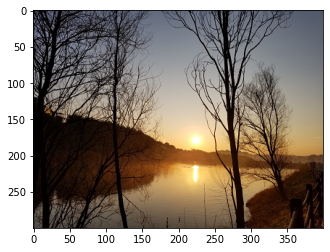

In [1]:
import numpy as np
import matplotlib.image as image
import matplotlib.pyplot as pyplot

sunny_lake = image.imread("SunnyLake.bmp")
pyplot.imshow(sunny_lake)
pyplot.show()

## 2. Obtain the gray scale image, I, by taking the average values of R, G, B channels.


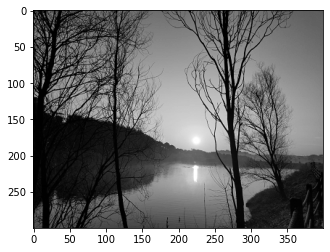

In [2]:
I = np.mean(sunny_lake.reshape(120000, 3), axis=1).reshape(300, 400)
pyplot.imshow(I, cmap="gray")

## 3. Obtain the histogram, h, of the gray scale image, I

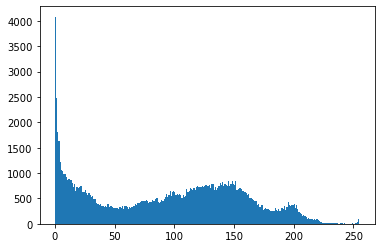

In [3]:
h = pyplot.hist(I.flatten(), 255)

## 4. Inspect h and propose a threshold value, T, to segment the image into two parts and hence obtain a binary image, B:

 * Part I: Pixels with intensity values above T.

 * Part II: Pixels with intensity values below T.

Text(0.5, 1.0, 'I > T = 175')

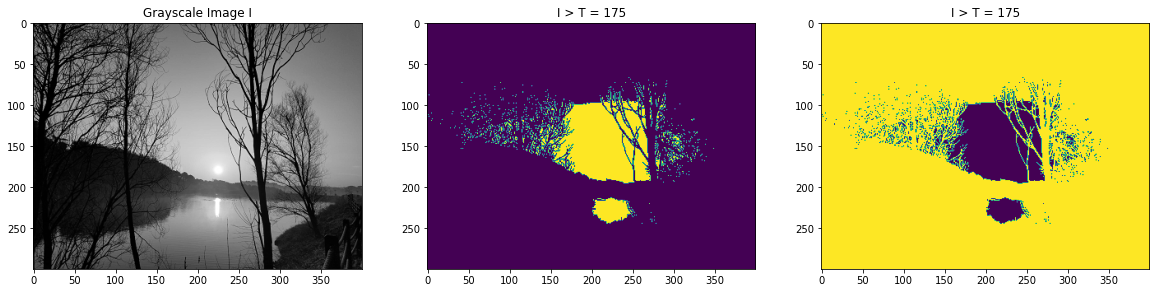

In [4]:
fig, axs = pyplot.subplots(1, 3)
fig.set_size_inches(20, 5)

axs[0].set_title("Grayscale Image I")
axs[0].imshow(I, cmap="gray") 

T = 175

axs[1].imshow(I > T)
axs[1].set_title(f"I > T = {T}") 
axs[2].imshow(I < T)
axs[2].set_title(f"I > T = {T}") 

# axs[1].set_xlabel(f"PSNR = {compute_psnr(oim, im):.2f}")

In [19]:
from IPython.display import HTML
fig = pyplot.figure()

ims = []
for i in range(256):
    im = pyplot.imshow(I > T, animated=True)
    im.axes.pyplottle(f"T = {T}")
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=10, blit=True, repeat_delay=1000)
HTML(ani.to_jshtml())

SyntaxError: invalid syntax (<ipython-input-19-53e0c446cdb6>, line 1)

## 10. Inspect Figure-1. Comment on the type of noise and propose a method to de-noise the image. Implement your method and present the de-noised image.